In [13]:
# 探究处理用户输入的方法对查询准确率的影响
import utils
from query import QueryManager
from advance import ReformatManager, RejectManager, HistoryManager

import warnings    

In [14]:
warnings.filterwarnings('ignore')
utils.setup()

print("正在加载数据库...")
queryManager = QueryManager()

正在加载数据库...


In [15]:
def test(questions):
    rejectManager = RejectManager()
    reformatManager = ReformatManager()
    historyManager = HistoryManager()

    history = []
    log = []
    
    for question in questions:
        cur_dict = {"total_question": question}
        deter = rejectManager.determine(question)
        cur_dict["deter"] = deter
        
        if deter == "False":
            log.append(cur_dict)
            continue
        
        _, scores = queryManager.query_one(question)
        cur_dict["nothing_result"] = scores
        
        expand_question = historyManager.expand(question, history)
        _, scores = queryManager.query_one(expand_question)
        cur_dict["expand_result"] = {"q": expand_question, "scores": scores}
        
        pairs = reformatManager.reformat(expand_question)
        cur_dict["reformat_result"] = []
        for idx, pair in enumerate(pairs):
            simplified_question, brief_ans = pair["question"], pair["answer"]
            cur_question_dict = {"q": simplified_question, "a": brief_ans}

            question = simplified_question
            query = f"{simplified_question} {brief_ans}"
            
            history.append(question)
            _, scores = queryManager.query_one(query)
            cur_question_dict["scores"] = scores
            cur_dict["reformat_result"].append(cur_question_dict)
        log.append(cur_dict)
    
    return log

In [16]:
test_questions = {
    "long1": ["医生您好，我最近这几个月总是感觉特别疲劳，早上起床的时候也觉得没精神，不像以前那样充满活力了。而且我发现自己的睡眠质量很差，晚上总是要醒好几次，有时候是因为要去厕所，有时候就只是躺在床上翻来覆去睡不着。另外，我还发现自己食欲下降了不少，体重也因此轻了几斤。之前没有过这样的情况，所以我有点担心是不是身体哪里出了问题。哦对了，我还有点头晕，尤其是在下午的时候更明显。"],
    "long2": ["大夫您好，我想跟您说说我最近遇到的一些小麻烦。大概从上个月开始吧，我就经常感到胸口闷闷的，偶尔还会有些轻微的疼痛，尤其是在深呼吸或者稍微运动一下之后就会感觉到。我也注意到自己这段时间心跳似乎比以前快了些，有时候坐在那里不动都会突然心跳加速。除此之外，我还发现手指尖有时候会有麻木的感觉，这种情况并不频繁，但是确实发生了几次。我自己查了一些资料，但也没看出个所以然来，所以来找您看看。"],
    "long3": ["您好医生，我这次来找您主要是想咨询一下关于我的消化问题。近两个月来，我总是觉得肚子胀胀的，尤其是吃过饭以后这种感觉更加明显。有时候还会伴有恶心感，甚至有几次差点没忍住吐出来。此外，我也注意到大便的习惯发生了变化，颜色看起来也不太正常，偏暗且不成形。虽然我知道这些症状听起来可能不是特别严重，但我还是很担心会影响到我的健康，所以希望您能帮我检查一下。"],
    "expand": [
        "脑卒中怎么办？", "这个病严重吗", "该如何治疗？"
    ], 
    "small": [
        "脑出血是什么病？", "脑出血怎么治疗？", "如何预防脑出血？"
    ]
}

In [17]:
total_result = {}
for k, v in test_questions.items():
    r = test(v)
    total_result[k] = r

In [19]:
print(total_result)

{'long1': [{'total_question': '医生您好，我最近这几个月总是感觉特别疲劳，早上起床的时候也觉得没精神，不像以前那样充满活力了。而且我发现自己的睡眠质量很差，晚上总是要醒好几次，有时候是因为要去厕所，有时候就只是躺在床上翻来覆去睡不着。另外，我还发现自己食欲下降了不少，体重也因此轻了几斤。之前没有过这样的情况，所以我有点担心是不是身体哪里出了问题。哦对了，我还有点头晕，尤其是在下午的时候更明显。', 'deter': 'True', 'nothing_result': [0.8621908057309482, 0.8600774996992064, 0.8586822795659512, 0.8554695671393672, 0.8536940792630631], 'expand_result': {'q': '医生您好，我最近这几个月总是感觉特别疲劳，早上起床的时候也觉得没精神，不像以前那样充满活力了。而且我发现自己的睡眠质量很差，晚上总是要醒好几次，有时候是因为要去厕所，有时候就只是躺在床上翻来覆去睡不着。另外，我还发现自己食欲下降了不少，体重也因此轻了几斤。之前没有过这样的情况，所以我有点担心是不是身体哪里出了问题。哦对了，我还有点头晕，尤其是在下午的时候更明显。', 'scores': [0.8621908057309482, 0.8600774996992064, 0.8586822795659512, 0.8554695671393672, 0.8536940792630631]}, 'reformat_result': [{'q': '持续疲劳、睡眠质量下降可能的原因是什么？', 'a': '可能由压力、焦虑、睡眠障碍、抑郁等引起。', 'scores': [0.8669562372418854, 0.8643116055818331, 0.858368149056328, 0.8543627193263432, 0.8507962044922758]}, {'q': '持续疲劳、睡眠质量下降应该如何改善？', 'a': '建立规律作息；减少压力，保持良好心态；避免刺激性饮料；保持健康饮食；如持续，咨询医生。', 'scores': [0.8678387501881687, 0.8673243289020875, 0.8

In [22]:
def ev(total_result):
    nothing_result = [0, 0, 0, 0, 0]
    expand_result = [0, 0, 0, 0, 0]
    final_result = [0, 0, 0, 0, 0]

    nothing_count = 0
    expand_count = 0
    final_count = 0
    for name, results in total_result.items():
        for id, result in enumerate(results):
            if result["deter"] == "False":
                print("not relevant")
                return
            
            if len(result["nothing_result"]) != 5:
                print("nothing result len != 5")
                return
            
            for i, n_r in enumerate(result["nothing_result"]):
                nothing_result[i] += n_r
            nothing_count += 1
            
            if len(result["expand_result"]["scores"]) != 5:
                print("expand result len != 5")
                return
            
            for i, e_r in enumerate(result["expand_result"]["scores"]):
                expand_result[i] += e_r
            expand_count += 1
            
            for r in result["reformat_result"]:
                if len(r["scores"]) != 5:
                    print("reformat result len != 5")
                    return
                for i, r_r in enumerate(r["scores"]):
                    final_result[i] += r_r
                final_count += 1
    
    for i in range(5):
        nothing_result[i] /= nothing_count
        expand_result[i] /= expand_count
        final_result[i] /= final_count
        
    return nothing_result, expand_result, final_result        

In [23]:
r = ev(total_result)

In [24]:
print(r)

([0.8702224632460083, 0.8659177095272492, 0.8629933131808016, 0.8608012833057864, 0.8597253378745281], [0.8794591761351248, 0.8751937322725986, 0.8736226113215051, 0.8716281037612629, 0.8695659492972221], [0.8892897644150458, 0.8805718365702747, 0.8767951966243211, 0.8743370123515859, 0.8719431248243673])


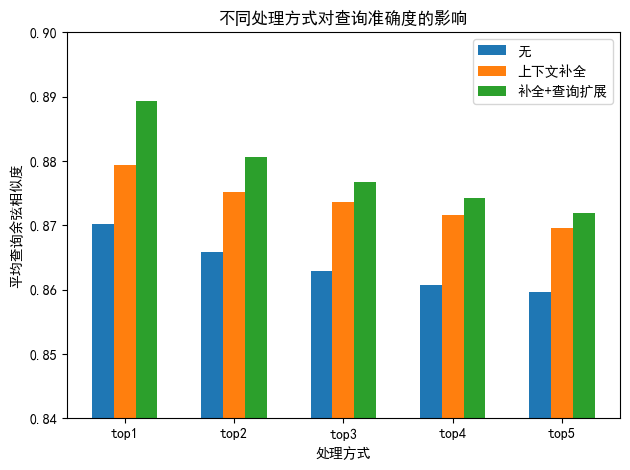

In [30]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 解决负号'-'显示为方块的问题

names = ['无', '上下文补全', '补全+查询扩展']
# 营养指标名称
tops = ['top1', 'top2', 'top3', 'top4', 'top5']
# 为每种水果创建一个随机的营养指标值列表
top_values = [r[0], r[1], r[2]]

# 设置柱状图的位置
bar_width = 0.2
index = np.arange(len(tops))

# 绘制每种水果的柱状图
for i in range(len(names)):
    plt.bar(index + i * bar_width, top_values[i], bar_width, label=names[i])

plt.xlabel('处理方式')
plt.ylabel('平均查询余弦相似度')
plt.title('不同处理方式对查询准确度的影响')
plt.xticks(index + bar_width, tops)
plt.ylim(0.84, 0.9)
plt.legend()
plt.tight_layout()
plt.show()